# Distribución de tipos de galaxias

In [112]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math as m

matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

## Ejercicio 17

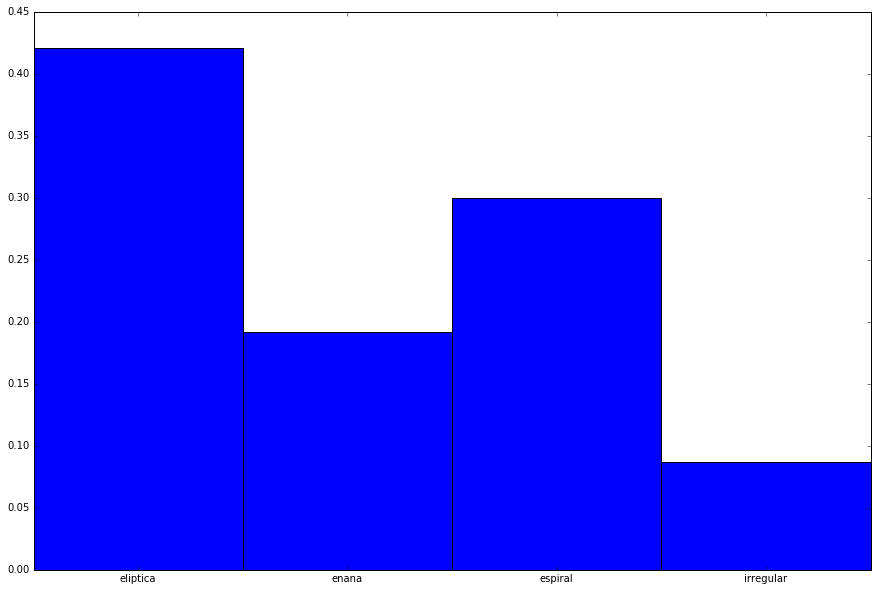

In [117]:
galaxias = ["eliptica","espiral","enana","irregular"]
prob = [0.4,0.3,0.2,0.1]

muestra = np.random.choice(galaxias,size=1000,p=prob)
n = muestra.shape[0]

tipos, cuentas = np.unique(muestra,return_counts=True)

plt.bar(np.arange(4),cuentas/float(n),width=1.0)
plt.xticks(np.arange(4)+0.5,tipos)
plt.show()

## Ejercicio 18

In [118]:
def my_rand(size=1,a=1664525,c=1013904223,M=2**32,x0=10,normed=True):
    x = []
    for i in range(size):
        r = (a*x0 + c)%M
        x0 = r
        if normed:
            r = r/float(M)
        x = np.append(x,r)
    return x

In [119]:
y = my_rand(size=10000,a=57,c=1,M=256,x0=10)

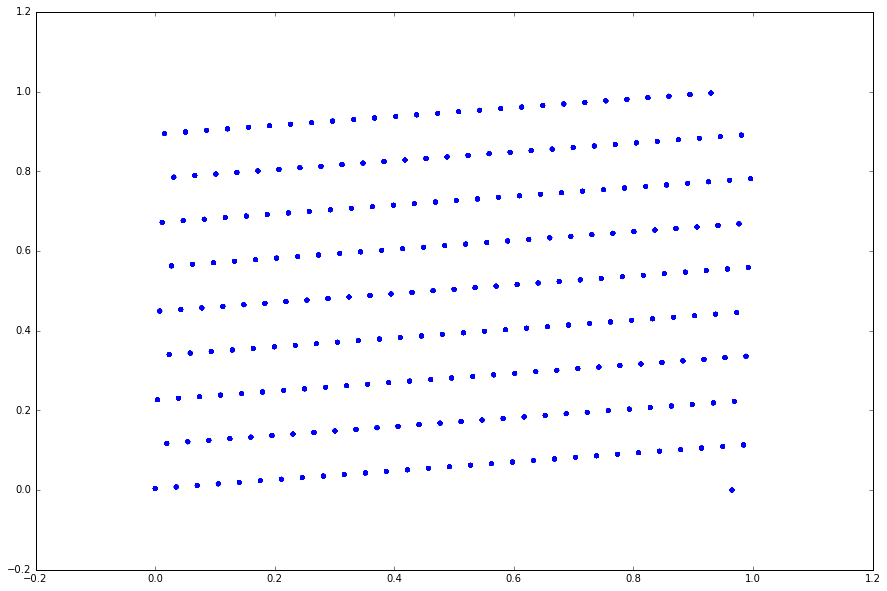

In [120]:
_x = y[:-1]
_y = y[1:]
plt.scatter(_x,_y,edgecolors='None')

In [121]:
y = my_rand(size=10000)

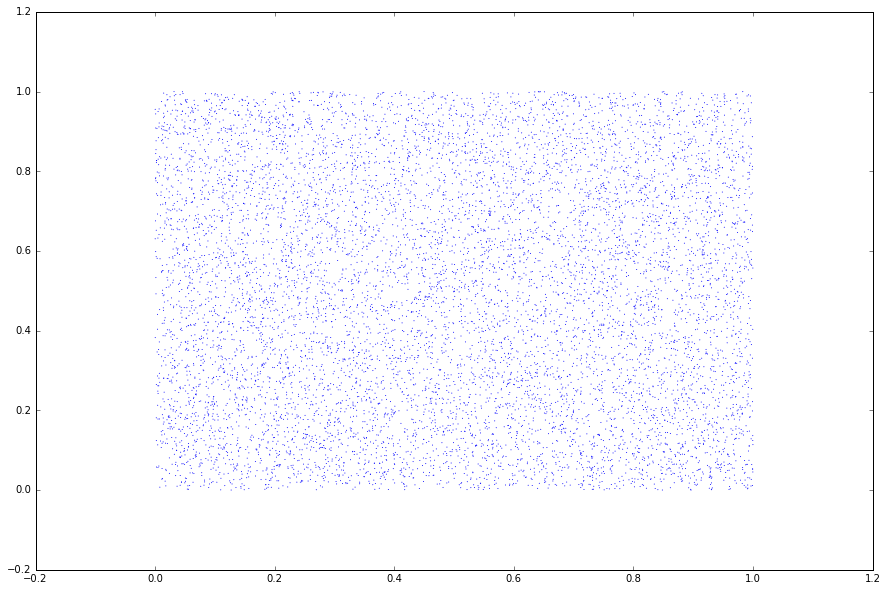

In [122]:
_x = y[:-1]
_y = y[1:]
plt.scatter(_x,_y,edgecolors='None',s=1)

### Buscamos el periodo

In [123]:
size = 10000
y = my_rand(size=size,x0=1024,normed=False)

a = y[0]
for i in range(1,size):
    if y[i] == a:
        break
print i
print y[0],y[i]

9999
2718377823.0 1226283856.0


In [124]:
print "%.3f %.3f %.3f" % (1./2.,1./4.,1./8.)
print "---"
for size in (10,100,1000):
    y = my_rand(size=size)
    mom1 = y.sum()/float(size)
    mom3 = (y**3).sum()/float(size)
    mom7 = (y**7).sum()/float(size)
    print "%.3f %.3f %.3f" % (mom1,mom3,mom7)

0.500 0.250 0.125
---
0.348 0.133 0.035
0.441 0.223 0.127
0.486 0.244 0.125


In [125]:
K = 10
N = 1000

x = np.zeros([K,N],dtype=np.float)
y = np.zeros([K,N],dtype=np.float)
for k in range(K):
    x[k,1:] = my_rand(size=N-1,x0=k)*2.*m.sqrt(2.) - m.sqrt(2.)
    y[k,1:] = my_rand(size=N-1,x0=k+1024)*2.*m.sqrt(2.) - m.sqrt(2.)


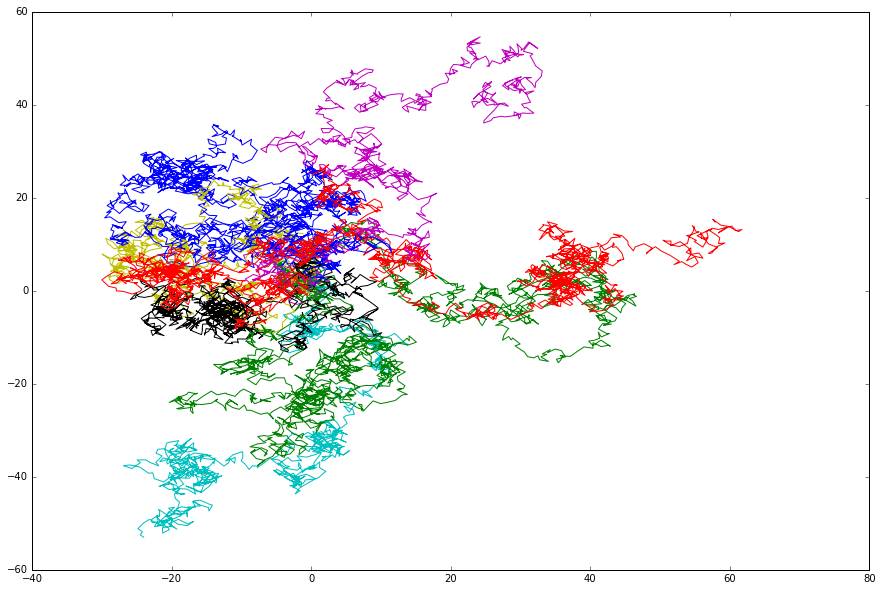

In [126]:
for k in range(K):
    dx = x[k,:].cumsum()
    dy = y[k,:].cumsum()
    plt.plot(dx,dy)

In [127]:
e = np.zeros(N,dtype=np.float)
dx = x.cumsum(axis=1)
dy = y.cumsum(axis=1)
d = np.sqrt(dx*dx+dy*dy)
for n in range(N):
    e[n] = d[:,n].sum()/float(K)

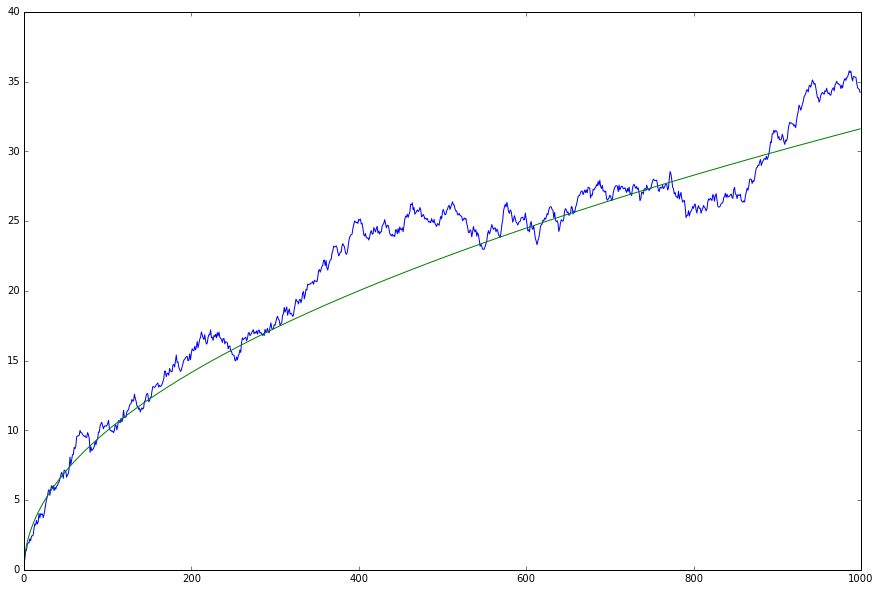

In [128]:
plt.plot(e)
plt.plot(np.sqrt(np.arange(N)))

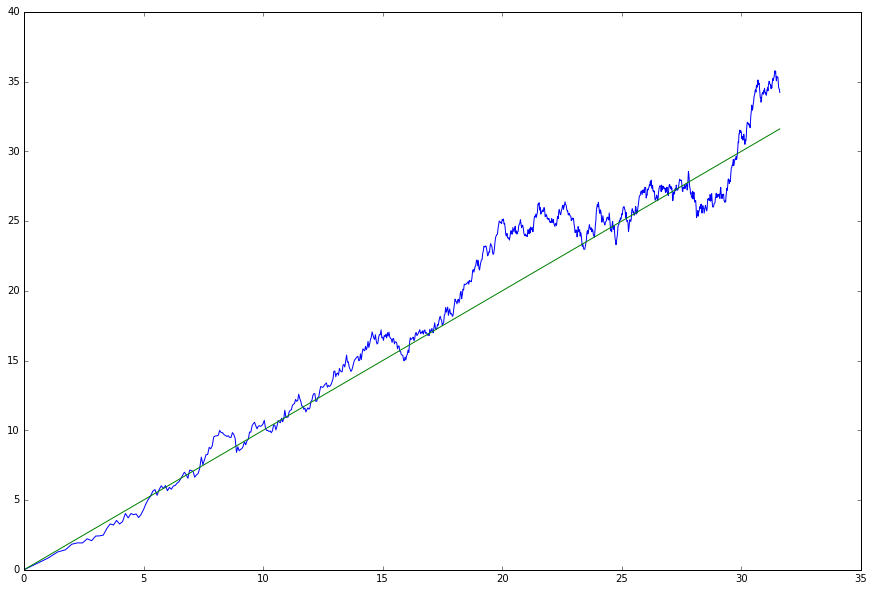

In [129]:
plt.plot(np.sqrt(np.arange(N)),e)
plt.plot(np.sqrt(np.arange(N)),np.sqrt(np.arange(N)))